<a href="https://colab.research.google.com/github/Karthik2486/Face_detection/blob/main/Model/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time 
%matplotlib inline



In [2]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
#load test iamge
test1 = cv2.imread('/content/test1.jpg')

#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

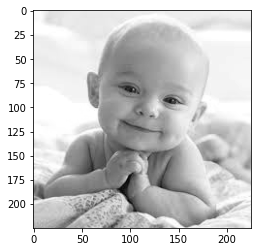

In [4]:
#if you have matplotlib installed then 
plt.imshow(gray_img, cmap='gray')


In [9]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_alt.xml')

In [10]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  1


In [11]:

#go over list of faces and draw them as rectangles on original colored img
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

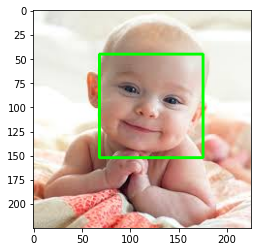

In [12]:
#conver image to RGB and show image
plt.imshow(convertToRGB(test1))

#Grouping Code into a Function

In [13]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return img_copy

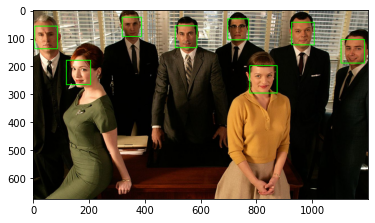

In [14]:
#load another image
test2 = cv2.imread('/content/test5.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

#Code - LBP Cascade Classifier

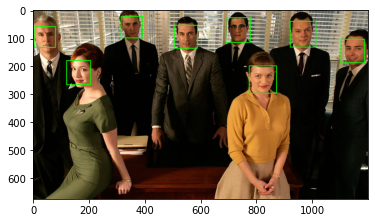

In [16]:
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('/content/lbpcascade_frontalface.xml')

#load test image
test2 = cv2.imread('/content/test5.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))